### This is the Jupyter notebook that shows the experiment results, the relationship between n, V, T and P.

In [1]:
# using matplotlib to plot the graphs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_paths = ['pn_v16_t300.txt', 'pt_n1000_v16.txt', 'pv_n1000_t300.txt', 'temp-time_vfix_400.txt', 'temp-time_vshake_400.txt']
titles = ['P-N', 'P-T', 'P-V', 'Temperature with volume fixed', 'Temperature with volume change']

In [3]:
# define some parameters
R = 8.31
V = 1.6 ** 3
n = 1000
T = 300

In [4]:
# Read the data files
def read_data(file_path, use_third_value=False):
    pressures = []
    values = []
    file_path = 'data/' + file_path
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():
                parts = line.split(',')
                pressure = float(parts[0])
                if use_third_value:
                    value = float(parts[2])  # only use the third value when reading the third data file
                else:
                    value = float(parts[1])  # default for using the second value
                pressures.append(pressure)
                values.append(value)
    return pressures, values

Estimated P/N = 548.8223660537378, RT/V = 608.6425781249999, error = -9.828463242835518%


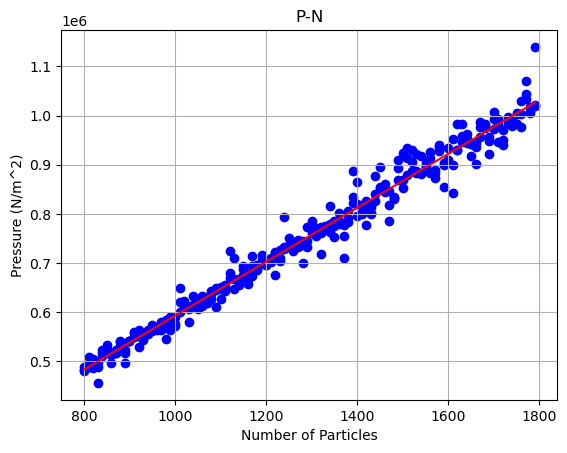

In [5]:
# plot of P-N relationship
pressures, numP = read_data(file_paths[0])

# Fit a linear trend line (1st degree polynomial)
coefficients = np.polyfit(numP, pressures, 1)
estimate = coefficients[0]
truth = R * T / V
error = (estimate - truth) / truth * 100
print(f"Estimated P/N = {estimate}, RT/V = {truth}, error = {error}%")
trend_line = np.poly1d(coefficients)

# Plot the data points
plt.scatter(numP, pressures, color='blue')
# Plot the trend line
plt.plot(numP, trend_line(numP), color='red', label='Trend line')

plt.title(titles[0])
plt.xlabel('Number of Particles')
plt.ylabel('Pressure (N/m^2)')
plt.grid(True)
plt.show()

Estimated P/T = 1909.1624211618391, nR/V = 2028.8085937499995, error = -5.897361286655899%


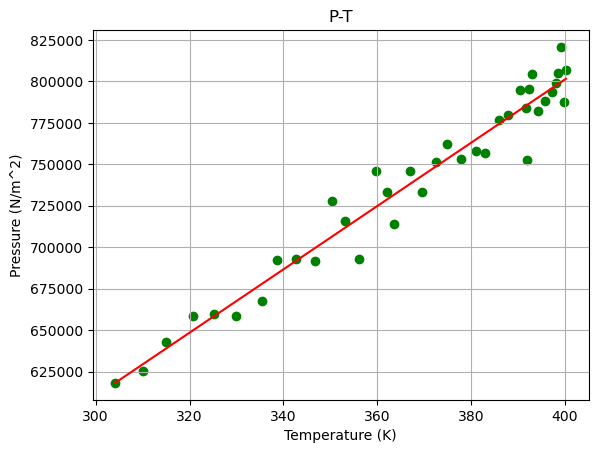

In [6]:
# plot of P-T relationship
pressures, temp = read_data(file_paths[1])

# Fit a linear trend line (1st degree polynomial)
coefficients = np.polyfit(temp, pressures, 1)
estimate = coefficients[0]
truth = n * R / V
error = (estimate - truth) / truth * 100
print(f"Estimated P/T = {estimate}, nR/V = {truth}, error = {error}%")
trend_line = np.poly1d(coefficients)

# Plot the data points
plt.scatter(temp, pressures, color='green')
# Plot the trend line
plt.plot(temp, trend_line(temp), color='red', label='Trend line')

plt.title(titles[1])
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (N/m^2)')
plt.grid(True)
plt.show()

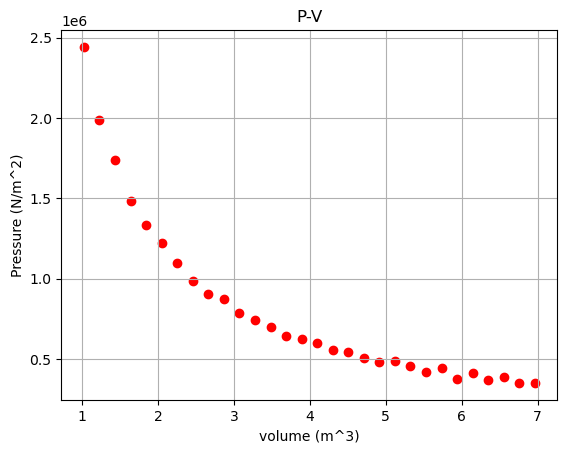

Estimated PV = 2493283.5243479945, nRT = 2493000.0, error = 0.011372817809646071%


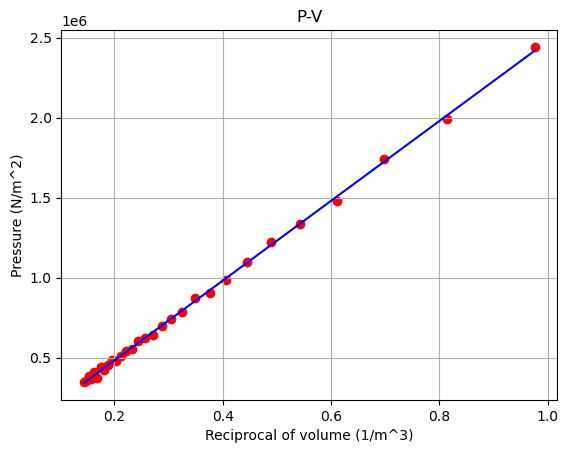

In [7]:
# plot of P-V relationship
pressures, vol = read_data(file_paths[2])
# Plot the data points
plt.scatter(vol, pressures, color='red')

plt.title(titles[2])
plt.xlabel('volume (m^3)')
plt.ylabel('Pressure (N/m^2)')
plt.grid(True)
plt.show()

pressures, vol_r = read_data(file_paths[2], use_third_value=True)

# Fit a linear trend line (1st degree polynomial)
coefficients = np.polyfit(vol_r, pressures, 1)
estimate = coefficients[0]
truth = n * R * T
error = (estimate - truth) / truth * 100
print(f"Estimated PV = {estimate}, nRT = {truth}, error = {error}%")
trend_line = np.poly1d(coefficients)

# Plot the data points
plt.scatter(vol_r, pressures, color='red')
# Plot the trend line
plt.plot(vol_r, trend_line(vol_r), color='blue', label='Trend line')

plt.title(titles[2])
plt.xlabel('Reciprocal of volume (1/m^3)')
plt.ylabel('Pressure (N/m^2)')
plt.grid(True)
plt.show()

At time 0.14999000000000923, the temperature reaches 374.8481342789497!


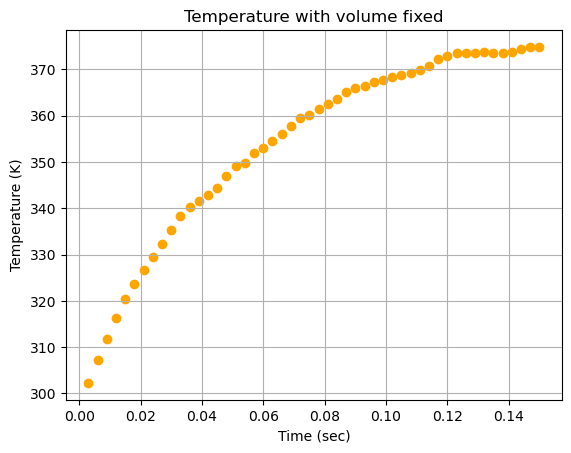

In [10]:
# plot of the temp change with time with fixed volume
time, temp = read_data(file_paths[3])
# print(f"time that the overall temperature reaches 400K: {time[-1]}")
print(f"At time {time[-1]}, the temperature reaches {temp[-1]}!")
plt.scatter(time, temp, color='orange')
plt.title(titles[3])
plt.xlabel('Time (sec)')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


At time 0.14999000000000923, the temperature reaches 379.9516995479516!


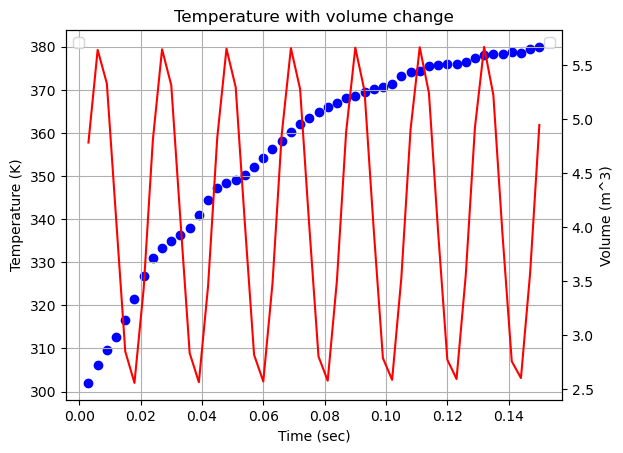

In [11]:
# plot of the temp change with time with changing volume

# Create figure and axes
fig, ax1 = plt.subplots()

time, temp = read_data(file_paths[4])
# print(f"time that the overall temperature reaches 400K: {time[-1]}")
print(f"At time {time[-1]}, the temperature reaches {temp[-1]}!")

# Create scatter plot on the left axis
ax1.scatter(time, temp, color='blue')
ax1.set_title(titles[4])
ax1.set_ylabel('Temperature (K)')
ax1.set_xlabel('Time (sec)')
ax1.legend(loc='upper left')
ax1.grid(True)

time, volume = read_data(file_paths[4], use_third_value=True)

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Create line plot on the right axis
ax2.plot(time, volume, color='red')
ax2.set_ylabel('Volume (m^3)')
ax2.legend(loc='upper right')

plt.show()